In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
heart = pd.read_csv(r'data/heart.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
X = heart.drop('HeartDisease', axis=1)
y=heart['HeartDisease']

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder




In [19]:
categorical_features = ["ChestPainType","RestingECG","ST_Slope","ExerciseAngina","Sex"]

categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

numeric_features = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median"))
])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat",categorical_transformer,categorical_features),
        ("num",numeric_transformer,numeric_features)
    ]
)

In [22]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [23]:
classification_models={
    "LinearSVC":LinearSVC(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(random_state=42)
    
}

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape
results={}

In [27]:
for model_name,model in classification_models.items():
    model_pipeline = Pipeline(steps=[
        ("preprocessor",preprocessor),
        ("model",model)
    ])

    print(f'fiitting {model_name}')
    model_pipeline.fit(X_train,y_train)
    print(f"scoring {model_name}")
    results[model_name]=model_pipeline.score(X_test,y_test)


fiitting LinearSVC
scoring LinearSVC
fiitting KNeighborsClassifier
scoring KNeighborsClassifier
fiitting LogisticRegression
scoring LogisticRegression
fiitting RandomForestClassifier


c:\Users\HP\Desktop\heart disease\heartenv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


scoring RandomForestClassifier


In [28]:
results

{'LinearSVC': 0.8532608695652174,
 'KNeighborsClassifier': 0.7065217391304348,
 'LogisticRegression': 0.8532608695652174,
 'RandomForestClassifier': 0.8858695652173914}

In [31]:
randF_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model", RandomForestClassifier())
])

randF_pipeline.fit(X_train,y_train)
y_pred=randF_pipeline.predict(X_test)
y_pred[:50]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1])

In [32]:
from sklearn.metrics import confusion_matrix,classification_report , precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


confusion_matrix(y_test,y_pred)


array([[66, 11],
       [12, 95]])

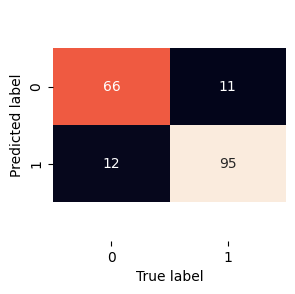

In [33]:
import seaborn as sns

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_pred)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [35]:
precision_score(y_test,y_pred)

0.8962264150943396

In [36]:
recall_score(y_test,y_pred)

0.8878504672897196

In [37]:
f1_score(y_test,y_pred)

0.892018779342723

In [38]:
from joblib import load,dump

dump(clf,"clf_model.joblib")

['clf_model.joblib']